<img src="Figs/GEOS_Logo.pdf" width="500" />


# Step **9** of **`G2FNL`**: <font color=blue>"plot_time_series.ipynb"</font>
#### Oct 16, 2021  <font color=red>(v. working)</font>
##### Jeonghyeop Kim (jeonghyeop.kim@gmail.com)

> input files: **`zeroFilled_i`**, **`outlierRemoved_i`**, **`timeCropped_i`**, **`station_list_full.dat`**, **`steps.txt`**, **`days_per_month.dat`**, and **`time_vector.dat`** \
> output files: **`timeseries_i.pdf`** 

#### <font color=red>UNIT in `outlierRemoved_i` is [mm], while any `other input files` have a unit of [m] </font>


0. This code is a part of GPS2FNL process 
1. It will plot three different time series for each station:
- time series uncorrected (timeCropped_i)
- time series step corrected (zeroFilled_i)
- time series outlier removed (outlierRemoved_i)
2. Each of the three different time series has three components (east-west, north-south, and up-down)
3. Investigate each *.pdf outfiles to make sure correcting and removing outlier steps work properly. 
4. This code will plot vertical `solid` lines for the equipment-related steps.
5. This code will plot vertical `dashed` lines for the earthquake-related steps.

<div class="alert alert-danger">
Do NOT run this code twice without re-starting the kernel
</div>

In [1]:
# 1. import modules
import numpy as np
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.figure import figaspect

In [2]:
current_dir=os.getcwd()
os.getcwd()

'/Users/jkim/main/GPS2FNL_2021/summer_project_2021'

In [3]:

#############################################
#(1)
list_full = "station_list_full.dat"
df_list=pd.read_csv(list_full, header=None)
df_list.columns=['StID']
N_list = len(df_list) 

#############################################
#(2)
timefile = 'time_vector.dat'
df_time=pd.read_csv(timefile, header=None)
df_time.columns = ['date']
startDateAnalysis=int(df_time.iloc[0])
endDateAnalysis=int(df_time.iloc[-1])
##########################################################################################
#(3)
metadata = "steps.txt" #file name
df_metadata=pd.read_csv(metadata, header=None, names=list('0123456'), sep=r'(?:,|\s+)', \
                        comment='#', engine='python')
## steps.txt is in an irregular shape
## equipment-related steps
df_steps_maintenance = df_metadata[df_metadata['2'] == 1].reset_index(drop=True)
df_steps_maintenance = df_steps_maintenance.iloc[:,[0,1,2,3]]
df_steps_maintenance.columns=['stID','time','flag','log']
date_old = df_steps_maintenance.time.tolist() # A DataFrame to a list
date_new = pd.to_datetime(date_old, format='%y%b%d').strftime('%Y%m%d') # convert date format
df_steps_maintenance.loc[:,'time'] = date_new # replaces with the new date  in YYYYMMDD
df_steps_maintenance['time']=df_steps_maintenance['time'].astype(int) #str to int
df_steps_maintenance = df_steps_maintenance[(df_steps_maintenance['time']>=startDateAnalysis) & \
                                            (df_steps_maintenance['time']<=endDateAnalysis)]

## earthquake-related steps
df_steps_earthquakes = df_metadata[df_metadata['2'] == 2].reset_index(drop=True)
df_steps_earthquakes.columns=['stID','time','flag','threshold','distance','mag','eventID'] 
#The step data has a time column in the form of yyMMMdd 
date_old = df_steps_earthquakes.time.tolist() # A DataFrame to a list
date_new = pd.to_datetime(date_old, format='%y%b%d').strftime('%Y%m%d') # convert date format
df_steps_earthquakes.loc[:,'time'] = date_new # replaces with the new date  in YYYYMMDD
df_steps_earthquakes['time']=df_steps_earthquakes['time'].astype(int) #str to int
df_steps_earthquakes = df_steps_earthquakes[(df_steps_earthquakes['time']>=startDateAnalysis) & \
                                            (df_steps_earthquakes['time']<=endDateAnalysis)]
df_steps_earthquakes = df_steps_earthquakes.reset_index(drop=True)

##########################################################################################
#(4)
days_per_month = "days_per_month.dat"
df_days_per_month = pd.read_csv(days_per_month, header=None)
df_days_per_month.columns = ['days']

In [4]:
processing_dir = os.path.join(current_dir, 'data', 'processing')
os.chdir(processing_dir) # cp to processing directory
os.getcwd()

'/Users/jkim/main/GPS2FNL_2021/summer_project_2021/data/processing'

>
**`For the better time axis ticks, pick the first day of each month`**

In [5]:
df_days_per_month = df_days_per_month.to_numpy()[:,0]
df_days_per_month
start = -1
time_tick_index = []
for N in range(len(df_days_per_month)):
    start = start + df_days_per_month[N]
    time_tick_index.append(start)
    
time_tick_index=time_tick_index[::3]

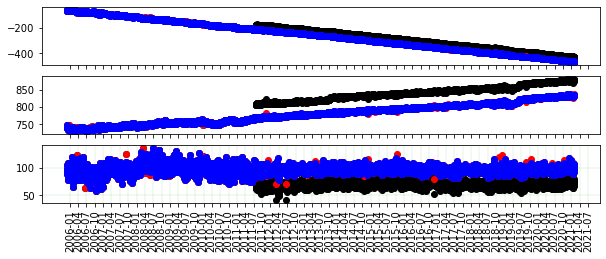

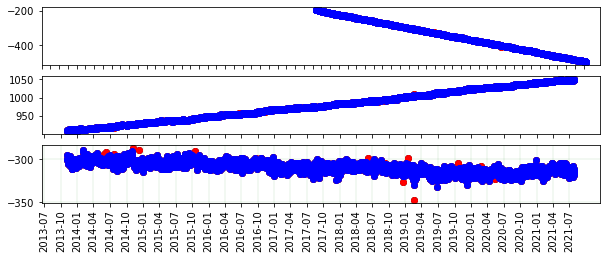

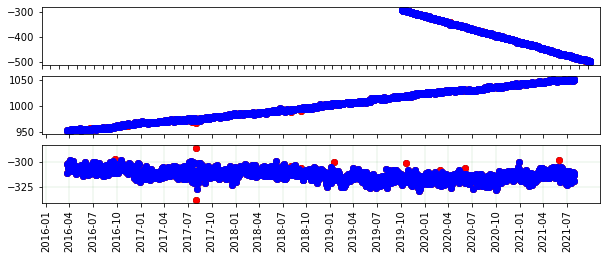

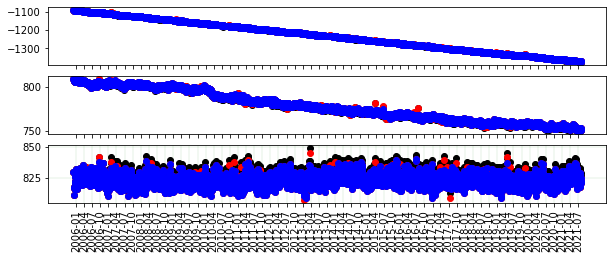

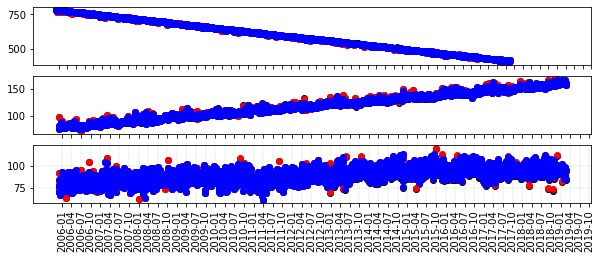

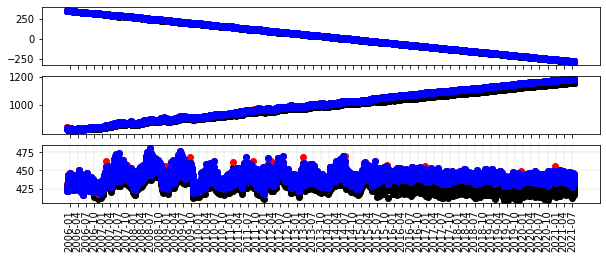

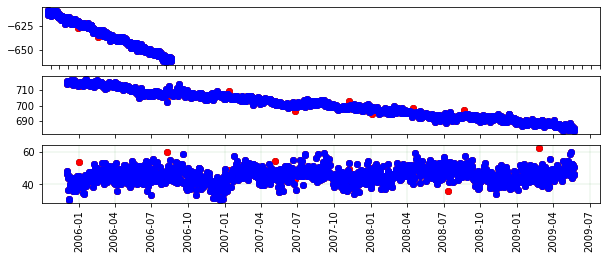

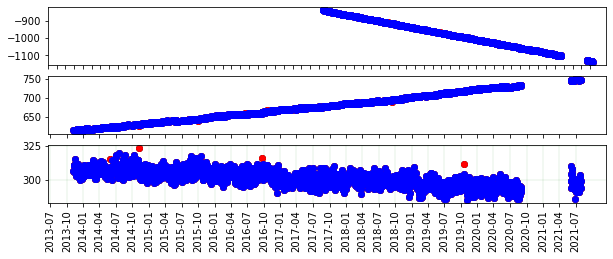

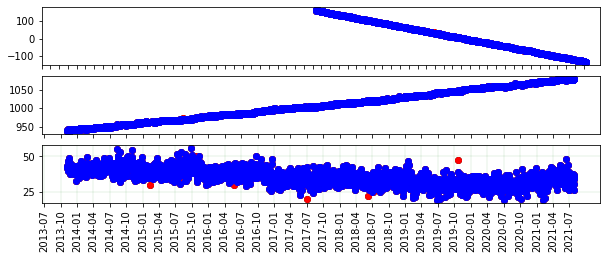

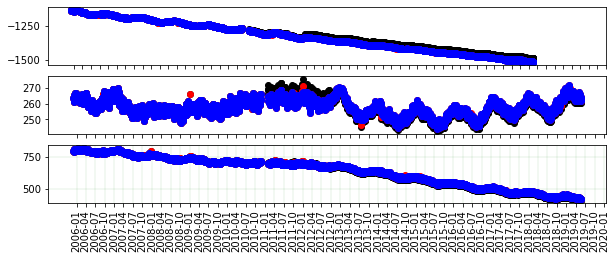

In [6]:
names = ['date','lon','lat','ue','un','uz','se','sn','sz','corr','flag']

for i in range(0,10):
    
    #LOAD three different time series
    
    file_uncorrected = 'timeCropped_'+str(i+1)
    df_uncorrected=pd.read_csv(file_uncorrected, header=None, sep = ' ')
    df_uncorrected.columns = names
    df_uncorrected_filled=df_time.merge(df_uncorrected, on='date', how='left')
    # MERGE the two data frames based on 'date' column. 
    # ** df_time (full time period) is the left dF.
    # ** df_uncorrected (timeCropped_i) is the right dF. 
    # how='left' means that 
    # MERGE them together filling all empty elements of df_input (right), 
    # comparing with time_vector (left), with NaN  
    df_uncorrected_filled=df_uncorrected_filled.fillna(float(0))
    # Fill up with zeros instead of NaNs.
    df_uncorrected_filled.loc[:,['ue','un','uz','se','sn','sz','corr']]=df_uncorrected_filled.loc[:,['ue','un','uz','se','sn','sz','corr']]*1000 
    # [m] to [mm]
    
    file_corrected = 'zeroFilled_'+str(i+1)
    df_corrected=pd.read_csv(file_corrected, header=None, sep = ' ')
    df_corrected.columns = names
    df_corrected.loc[:,['ue','un','uz','se','sn','sz','corr']]=df_corrected.loc[:,['ue','un','uz','se','sn','sz','corr']]*1000
    
    
    file_no_outlier = 'outlierRemoved_'+str(i+1)
    df_no_outlier=pd.read_csv(file_no_outlier, header=None, sep = ' ')
    df_no_outlier.columns = names
    
    
    
    t_raw = df_no_outlier.loc[:,['date']]
    t_raw = t_raw.to_numpy()[:,0]
    date_fmt = '%Y%m%d'
    dt_t = [dt.datetime.strptime(str(i), date_fmt) for i in t_raw]
    t = [mdates.date2num(i) for i in dt_t] #x in 'datenum'-like format in MATLAB 
    
    ue=df_no_outlier.loc[:,['ue']]
    ue.replace(0, np.nan, inplace=True) #zero to nan
    ue_outlier=df_corrected.loc[:,['ue']]
    ue_outlier.replace(0, np.nan, inplace=True) #zero to nan
    ue_step = df_uncorrected_filled.loc[:,['ue']]
    ue_step.replace(0, np.nan, inplace=True) #zero to nan
    
    un=df_no_outlier.loc[:,['un']]
    un.replace(0, np.nan, inplace=True) #zero to nan
    un_outlier=df_corrected.loc[:,['un']]
    un_outlier.replace(0, np.nan, inplace=True) #zero to nan
    un_step = df_uncorrected_filled.loc[:,['un']]
    un_step.replace(0, np.nan, inplace=True) #zero to nan
    
    uz=df_no_outlier.loc[:,['uz']]
    uz.replace(0, np.nan, inplace=True) #zero to nan
    uz_outlier=df_corrected.loc[:,['uz']]
    uz_outlier.replace(0, np.nan, inplace=True) #zero to nan
    uz_step = df_uncorrected_filled.loc[:,['uz']]
    uz_step.replace(0, np.nan, inplace=True) #zero to nan
    
    
    
    
    w, h = figaspect(1/2.5)
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(w,h))

    ax1.plot_date(t, ue_step, 'ok')
    ax1.plot(t, ue_outlier, 'or')
    ax1.plot(t, ue, 'ob')
    
    ax2.plot_date(t, un_step, 'ok')
    ax2.plot(t, un_outlier, 'or')
    ax2.plot(t, un, 'ob')
    
    ax3.plot_date(t, uz_step, 'ok')
    ax3.plot(t, uz_outlier, 'or')
    ax3.plot(t, uz, 'ob')
    
    date_formatter = mdates.DateFormatter('%Y-%m')
    ax1.xaxis.set_major_formatter(date_formatter)
    # This simply rotates the x-axis tick labels slightly so they fit nicely.
    fig.autofmt_xdate()
    plt.xticks(rotation=90,ha='center')
    plt.grid(color='g', linestyle='-', linewidth=0.1)
    #ax.xaxis.set_major_locator(plt.MaxNLocator(31)) #evenly 31 ticks
    #ax1.set_aspect('auto')
    ticks1 = [t[index] for index in time_tick_index]
    
    ax1.set_xticks(ticks1)
    #plt.show()
    fig.savefig('plot_timeseries_'+str(i+1)+'.pdf',bbox_inches='tight')